## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import glob
from preprocessing import *
import os

In [2]:
nx, ny = (9,6)

In [3]:
images = glob.glob('camera_cal/calibration*.jpg')

In [4]:
objpoints, imgpoints = get_img_obj_points(images, nx, ny)

In [5]:
create_pickle_file(objpoints, imgpoints)

In [6]:
dist_pickle = pickle.load( open( "wide_dist.pickle", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

In [7]:
test_images = []
for image in glob.glob('test_images/*.jpg'):
    test_images.append(image)

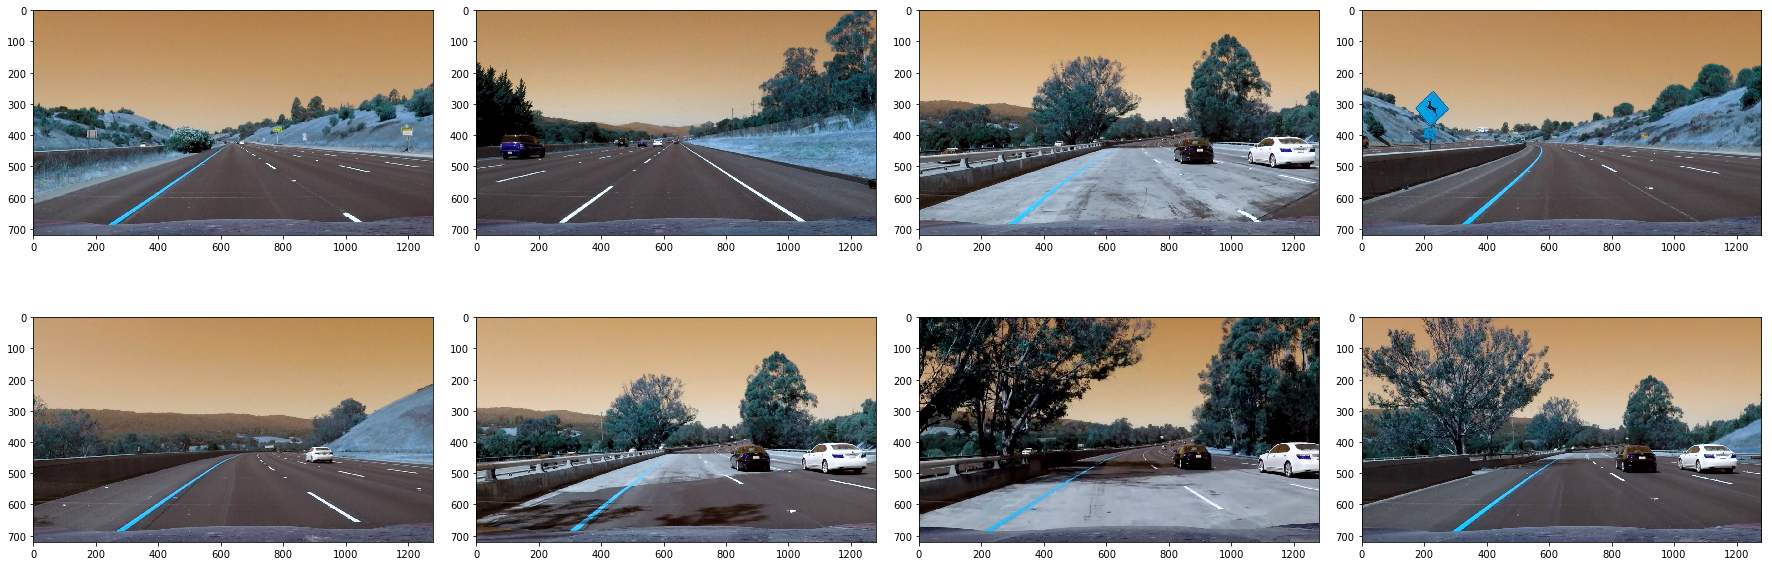

In [8]:
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(test_images)//2
for i in range(len(test_images)//2):
    ax1[i].imshow(cv2.imread(test_images[i]))
    ax2[i].imshow(cv2.imread(test_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Undistort Images

In [9]:
for image in test_images:
    img = cv2.imread(image)
    img = np.copy(img)
    ret, mtx, dist, rvecs, tvecs = calibrate_camera(img, objpoints, imgpoints)
    img = undistort_image(img, mtx, dist)
    cv2.imshow('img', img)
    file_img = image.split('/')[1]
    file_path = os.path.join('output_images/undistorted_images/',file_img)
    cv2.imwrite(file_path, img)

In [10]:
undistorted_images = []
for image in glob.glob('output_images/undistorted_images/*.jpg'):
    undistorted_images.append(image)

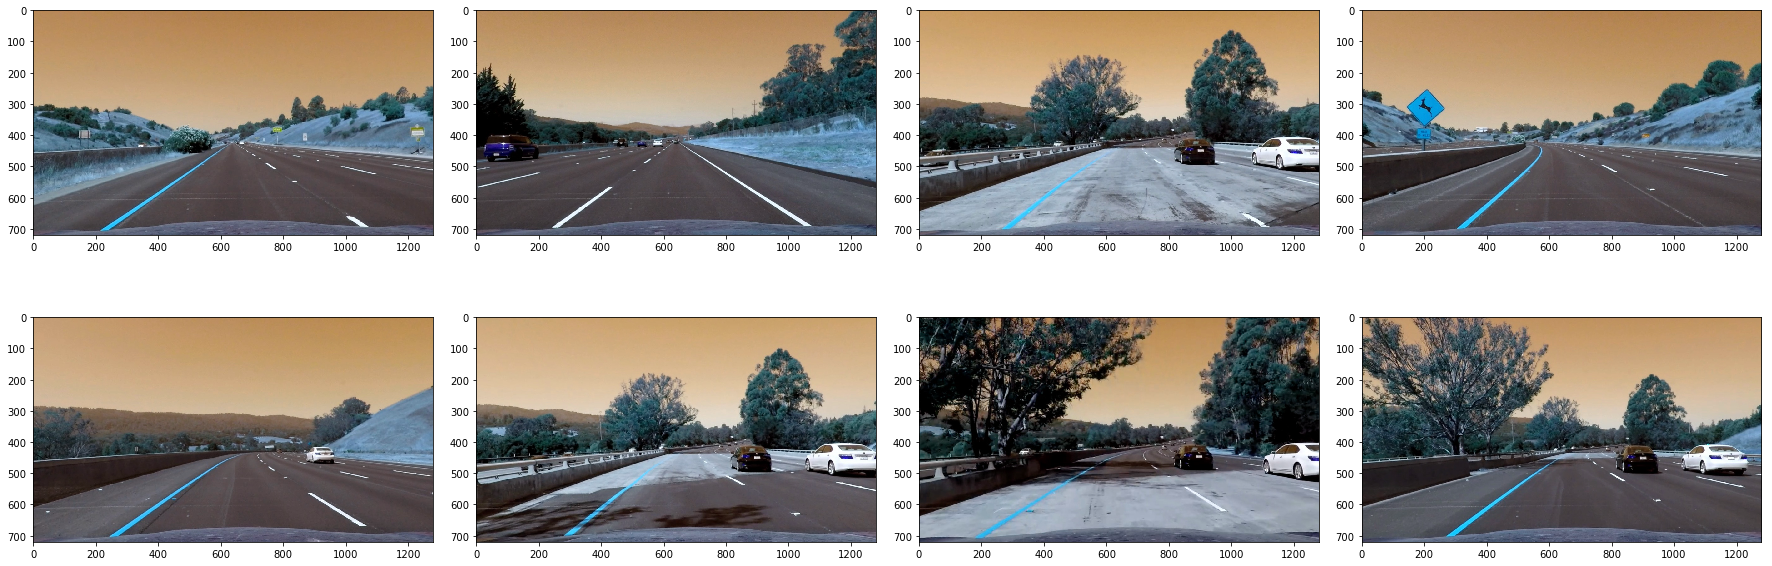

In [11]:
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(undistorted_images)//2
for i in range(len(undistorted_images)//2):
    ax1[i].imshow(cv2.imread(undistorted_images[i]))
    ax2[i].imshow(cv2.imread(undistorted_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Color Transform and gradient transform

In [12]:
## 1 - RGB CHANNEL TRANFORM
## 2 - HSL CHANNEL TRANSFORM
## 3 - Sobelx transform
## 4 - Sobel y transform
## 4 

In [26]:
for image in undistorted_images:
    img = cv2.imread(image)
    img = np.copy(img)
    print(img.shape)
    #img = region_selection(img)
    img = pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100))
    file_img = image.split('/')[2]
    
    file_path = os.path.join('output_images/transform/',file_img)
    cv2.imwrite(file_path, img)
    

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)


In [14]:
transformed_images = []
for image in glob.glob('output_images/transform/*.jpg'):
    transformed_images.append(image)

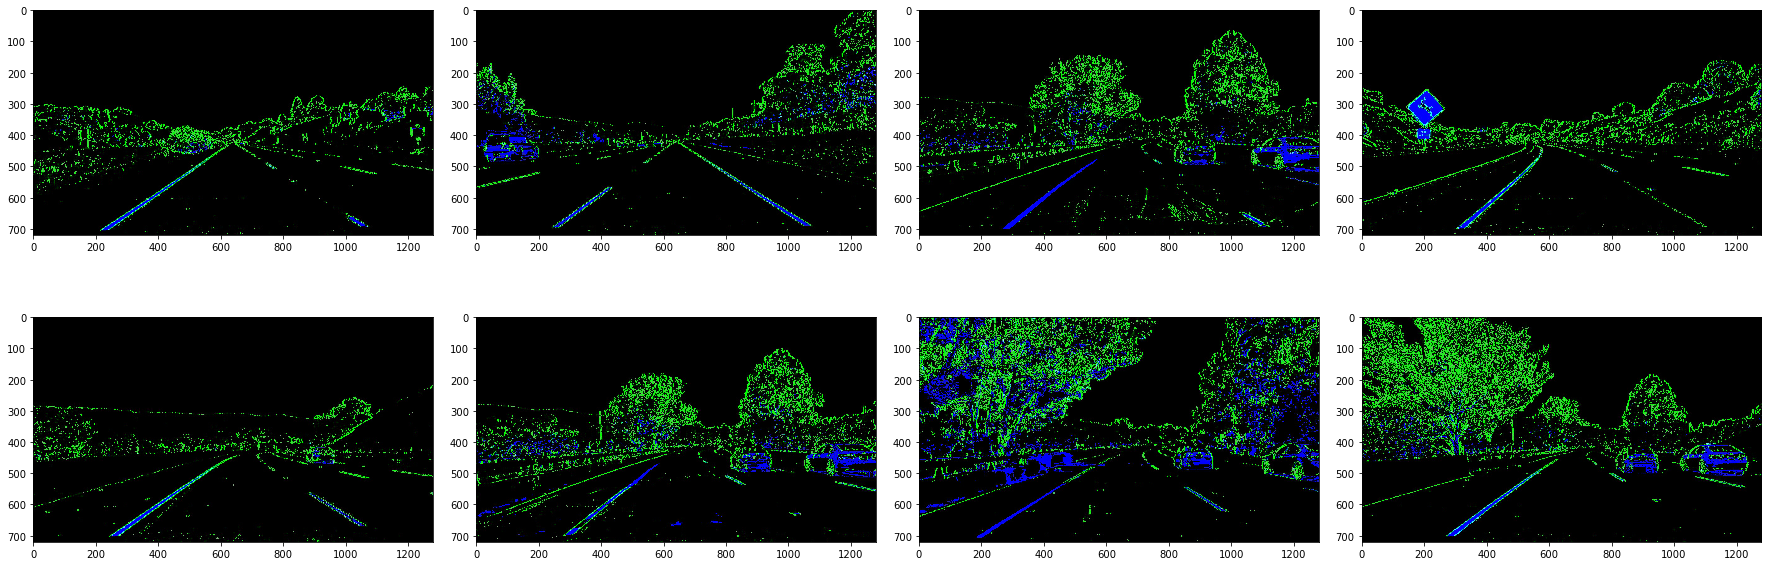

In [15]:
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(transformed_images)//2
for i in range(len(transformed_images)//2):
    ax1[i].imshow(cv2.imread(transformed_images[i]))
    ax2[i].imshow(cv2.imread(transformed_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Perspective Transform

In [16]:
offset = 100
for image in transformed_images:
    img = cv2.imread(image)
    img = np.copy(img)
    img_size = (img.shape[1], img.shape[0])
    src = np.float32([imgpoints[0][0], imgpoints[0][nx-1], imgpoints[0][-1], imgpoints[0][-nx]])
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], \
                    [img_size[0]-offset, img_size[1]-offset], \
                    [offset, img_size[1]-offset]])
    transform = perspective_transform(src, dst)
    warped = warp_image(img, transform, img_size, flags=cv2.INTER_LINEAR)
    
    file_img = image.split('/')[2]
    
    file_path = os.path.join('output_images/warped_images/',file_img)
    cv2.imwrite(file_path, img)
    




In [27]:
warped_images = []
for image in glob.glob('testing/*.jpg'):
    warped_images.append(image)

In [ ]:
warped_images

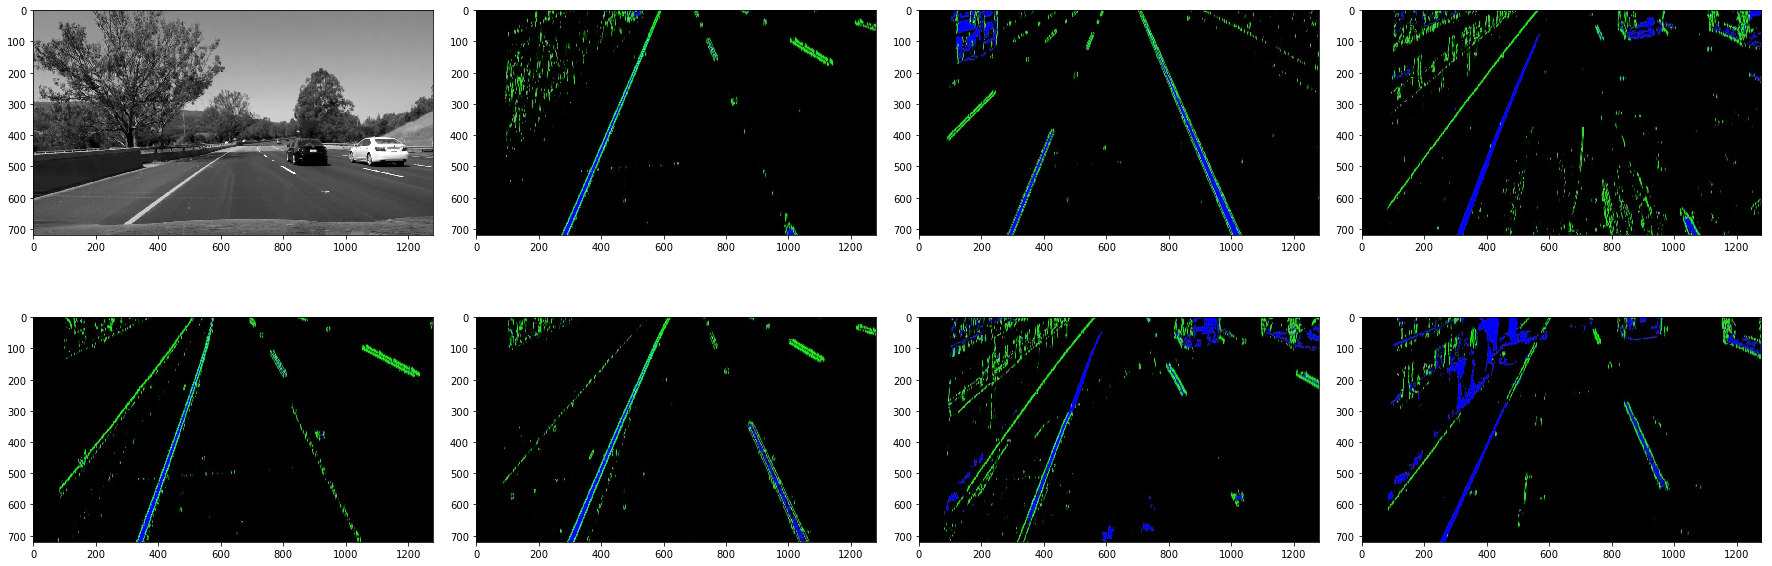

In [28]:
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(warped_images)//2
for i in range(len(warped_images)//2):
    ax1[i].imshow(cv2.imread(warped_images[i]))
    ax2[i].imshow(cv2.imread(warped_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Detect lane pixels and fit to find the lane boundary

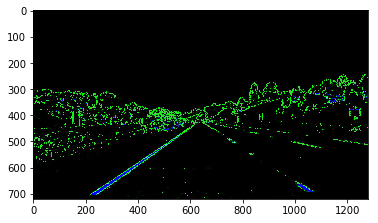

In [29]:
img_path = transformed_images[0]

img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [20]:
img.shape

(720, 1280, 3)

In [37]:
warped_images

['testing/gray.jpg',
 'testing/straight_lines1.jpg',
 'testing/straight_lines2.jpg',
 'testing/test1.jpg',
 'testing/test2.jpg',
 'testing/test3.jpg',
 'testing/test4.jpg',
 'testing/test5.jpg',
 'testing/test6.jpg']

In [41]:
cv2.imread(warped_images[1])[:, :, 0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

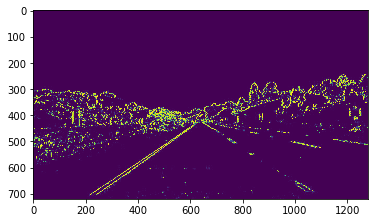

In [21]:
s_channel = img[:, :, 1]
plt.imshow(s_channel)
plt.show()

In [50]:
print(warped_images[1])

testing/straight_lines1.jpg


1
(720, 1280, 3)
hello
[ 86  87  88 ..., 274 275 276]
[480 480 480 ...,  79  79  79]


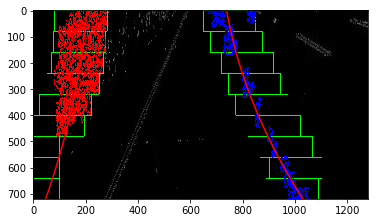

Left curvatures,  893.502811331
right curvatures,  519.563864532
Vehicle position 706.533337932
2
(720, 1280, 3)
hello
[ 83  84  85 ..., 278 279 280]
[400 400 400 ...,  79  79  79]


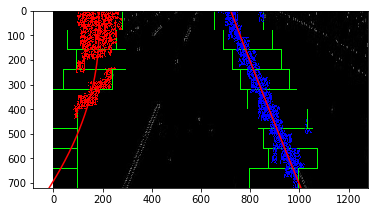

Left curvatures,  333.242730226
right curvatures,  7011.30844867
Vehicle position 3672.27558945
3
(720, 1280, 3)
hello
[ 81  82  83 ..., 302 303 304]
[640 640 640 ...,  79  79  79]


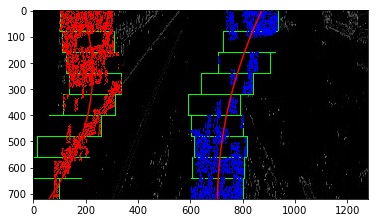

Left curvatures,  232.232345964
right curvatures,  516.33402151
Vehicle position 374.283183737
4
(720, 1280, 3)
hello
[ 84  87  83 ..., 512 513 514]
[664 664 665 ...,  79  79  79]


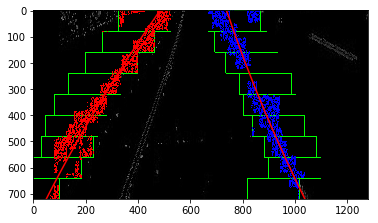

Left curvatures,  1239.09481291
right curvatures,  1510.833549
Vehicle position 1374.96418096
5
(720, 1280, 3)
hello
[ 82  83  84 ..., 509 510 511]
[560 560 560 ...,  79  79  79]


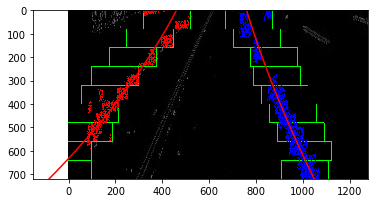

Left curvatures,  526.825415553
right curvatures,  1288.56546748
Vehicle position 907.695441516
6
(720, 1280, 3)
hello
[ 83  86  87 ..., 301 302 303]
[640 640 640 ...,  79  79  79]


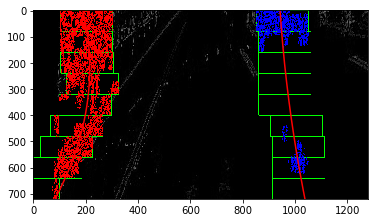

Left curvatures,  309.83484427
right curvatures,  1806.52692615
Vehicle position 1058.18088521
7
(720, 1280, 3)
hello
[ 81  82  83 ..., 373 374 379]
[560 560 560 ...,  79  79  79]


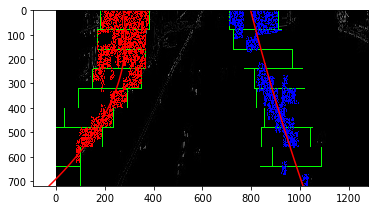

Left curvatures,  199.675865288
right curvatures,  2677.76719885
Vehicle position 1438.72153207
8
(720, 1280, 3)
hello
[ 89  90  91 ..., 503 504 505]
[560 560 560 ...,  79  79  79]


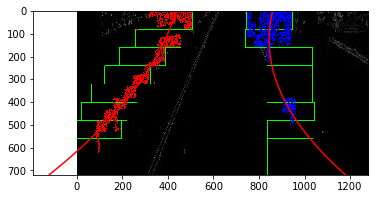

Left curvatures,  256.497517131
right curvatures,  177.44505674
Vehicle position 216.971286936


In [53]:
for i in range(1, len(warped_images)):
    print(i)
    img = cv2.imread(warped_images[i])
    img  = np.copy(img)
    print(img.shape)
    s_channel = img[:, :, 0]
    img, left_fit_cr, right_fit_cr, ploty  = fit_polynomial(s_channel)
    left_curverad, right_curverad = calculate_radius_curvature(ploty, left_fit_cr, right_fit_cr)
    print('Left curvatures, ', left_curverad)
    print('right curvatures, ', right_curverad)
    print('Vehicle position',(left_curverad + right_curverad)/2 )

### Determine the curvature of the lane and vehicle position with respect to center

### Warp the detected lane boundaries back onto the original image

### Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.